In [70]:
import pandas as pd

In [71]:
a = pd.read_csv("first_data_covid.csv") # 0 for fake
a.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [72]:
b = pd.read_excel("fake_new_dataset.xlsx").drop(columns=['Unnamed: 0', 'subcategory']) #0 for fake
b['headlines'] = b['title'] + ' ' + b['text']
b['outcome'] = b['label']
b = b.drop(columns=['title', 'text', 'label'])
b.head()

,headlines,outcome
0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,0
1,Other Viewpoints: COVID-19 is worse than the f...,1
2,Bermuda's COVID-19 cases surpass 100 The Minis...,1
3,Purdue University says students face 'close to...,0
4,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,0


In [73]:
a['headlines'][0]

'A post claims compulsory vacination violates the principles of bioethics, that coronavirus doesnâ€™t exist, that the PCR test returns many false positives, and that influenza vaccine is related to COVID-19.'

In [74]:
len(a), len(b)

(10201, 3119)

In [75]:
data = pd.concat([a, b])
len(data), data.head()

(13320,
                                            headlines  outcome
 0  A post claims compulsory vacination violates t...        0
 1  A photo claims that this person is a doctor wh...        0
 2  Post about a video claims that it is a protest...        0
 3  All deaths by respiratory failure and pneumoni...        0
 4  The dean of the College of Biologists of Euska...        0)

In [76]:
data['headlines'] = data["headlines"].str.lower()
data.head()

,headlines,outcome
0,a post claims compulsory vacination violates t...,0
1,a photo claims that this person is a doctor wh...,0
2,post about a video claims that it is a protest...,0
3,all deaths by respiratory failure and pneumoni...,0
4,the dean of the college of biologists of euska...,0


In [77]:
import string
PUNCT_TO_REMOVE = string.punctuation + '\n\t'
print(PUNCT_TO_REMOVE)
data['headlines'] = data['headlines'].apply(str)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["headlines"] = data["headlines"].apply(lambda text: remove_punctuation(text))
data.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
	


,headlines,outcome
0,a post claims compulsory vacination violates t...,0
1,a photo claims that this person is a doctor wh...,0
2,post about a video claims that it is a protest...,0
3,all deaths by respiratory failure and pneumoni...,0
4,the dean of the college of biologists of euska...,0


In [79]:
data['headlines'].iloc[11002]

'30 patients in philippines negative for 2019ncov the department of health doh announced monday february 3 that at least 30 patients under investigation puis have been found negative for the novel coronavirus acute respiratory disease 2019ncov ardthe 30 are among the total of 80 puis recorded in the country as of 12 pm monday february 3doh secretary francisco duque iii said of the 80 puis 67 have been admitted and isolated in different hospitals while 10 were discharged but are still under strict monitoringalso included in the list are the two positive cases  a 38yearold chinese woman who remains in isolation at san lazaro hospital and her 44yearold partner who died saturday february 1  as well as the 29yearold chinese man who died at san lazaro hospital last weekduque clarified that the 29yearold chinese man who died last week tested negative for 2019ncov but he had human immunodeficiency virus hivduque said the increase in the number of puis can be attributed to better surveillance s

In [80]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["headlines"] = data["headlines"].apply(lambda text: lemmatize_words(text))
data.head()

,headlines,outcome
0,a post claim compulsory vacination violates th...,0
1,a photo claim that this person is a doctor who...,0
2,post about a video claim that it is a protest ...,0
3,all death by respiratory failure and pneumonia...,0
4,the dean of the college of biologist of euskad...,0


In [81]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [82]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["headlines"] = data["headlines"].apply(lambda text: remove_stopwords(text))
data.head()

,headlines,outcome
0,post claim compulsory vacination violates prin...,0
1,photo claim person doctor died attending many ...,0
2,post video claim protest confination town aran...,0
3,death respiratory failure pneumonia registered...,0
4,dean college biologist euskadi state lot pcr f...,0


In [83]:
data['headlines'].iloc[11002]

'30 patient philippine negative 2019ncov department health doh announced monday february 3 least 30 patient investigation puis found negative novel coronavirus acute respiratory disease 2019ncov ardthe 30 among total 80 puis recorded country 12 pm monday february 3doh secretary francisco duque iii said 80 puis 67 admitted isolated different hospital 10 discharged still strict monitoringalso included list two positive case 38yearold chinese woman remains isolation san lazaro hospital 44yearold partner died saturday february 1 well 29yearold chinese man died san lazaro hospital last weekduque clarified 29yearold chinese man died last week tested negative 2019ncov human immunodeficiency virus hivduque said increase number puis attributed better surveillance system contact tracing people may come contact first two positive case widened pui category cover whole chinaon sunday february 2 president rodrigo duterte expanded temporary travel ban include tourist coming mainland china special adm

In [84]:
from collections import Counter
cnt = Counter()
for text in data["headlines"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(50)

[('virus', 13244),
 ('coronavirus', 11267),
 ('ha', 10012),
 ('china', 9274),
 ('health', 7328),
 ('wa', 6950),
 ('people', 6669),
 ('case', 6375),
 ('corona', 6185),
 ('said', 5404),
 ('new', 4752),
 ('covid19', 4650),
 ('wuhan', 4246),
 ('outbreak', 4099),
 ('chinese', 4096),
 ('also', 4067),
 ('disease', 3419),
 ('country', 3359),
 ('patient', 3356),
 ('spread', 3322),
 ('2019ncov', 3259),
 ('one', 3049),
 ('infection', 2968),
 ('u', 2800),
 ('hospital', 2752),
 ('time', 2701),
 ('government', 2665),
 ('world', 2640),
 ('novel', 2610),
 ('state', 2519),
 ('death', 2425),
 ('first', 2423),
 ('public', 2404),
 ('day', 2366),
 ('confirmed', 2355),
 ('infected', 2348),
 ('city', 2346),
 ('medical', 2324),
 ('number', 2093),
 ('may', 2055),
 ('two', 2024),
 ('would', 1952),
 ('reported', 1937),
 ('vaccine', 1908),
 ('respiratory', 1895),
 ('symptom', 1889),
 ('year', 1861),
 ('say', 1816),
 ('2020', 1775),
 ('travel', 1767)]

In [88]:
Counter(data['outcome']) #0 for true news, 1 for fake news

Counter({0: 10785, 1: 2535})

In [92]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords_ = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

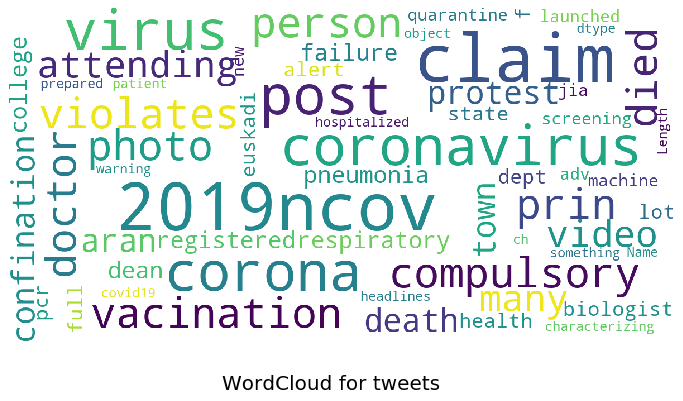

In [93]:
show_wordcloud(data['headlines'], "WordCloud for tweets") #simple visualization for the most common words

In [96]:
total_strings= ' '.join(data['headlines'].values).split()
total_strings[10:20], len(set(total_strings))

(['pcr',
  'test',
  'return',
  'many',
  'false',
  'positive',
  'influenza',
  'vaccine',
  'related',
  'covid19'],
 70380)

In [112]:
from nltk import bigrams

bigrams = list(map(" ".join, list(bigrams(total_strings))))

In [125]:
total = total_strings + bigrams
total[-2:]

['ownership education', 'education child']

In [126]:
for word in total:
    cnt[word] += 1
        
cnt.most_common(50) #most common words including bigrams

[('corona virus', 31283),
 ('virus', 26488),
 ('coronavirus', 22534),
 ('ha', 20024),
 ('china', 18548),
 ('health', 14656),
 ('wa', 13900),
 ('novel coronavirus', 13650),
 ('people', 13338),
 ('case', 12750),
 ('corona', 12370),
 ('said', 10808),
 ('new', 9504),
 ('covid19', 9300),
 ('wuhan', 8492),
 ('outbreak', 8198),
 ('chinese', 8192),
 ('also', 8134),
 ('public health', 7371),
 ('disease', 6838),
 ('new coronavirus', 6811),
 ('country', 6718),
 ('patient', 6712),
 ('spread', 6644),
 ('confirmed case', 6573),
 ('2019ncov', 6518),
 ('one', 6098),
 ('infection', 5936),
 ('world health', 5789),
 ('u', 5600),
 ('hospital', 5504),
 ('time', 5402),
 ('united state', 5397),
 ('government', 5330),
 ('world', 5280),
 ('novel', 5220),
 ('state', 5038),
 ('hong kong', 4851),
 ('death', 4850),
 ('first', 4846),
 ('public', 4808),
 ('health organization', 4802),
 ('coronavirus outbreak', 4795),
 ('day', 4732),
 ('confirmed', 4710),
 ('infected', 4696),
 ('city', 4692),
 ('coronavirus 2019ncov'